In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# checking total null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# replacing null values in age with median
median_value = df['Age'].median()
df['Age'].fillna(median_value, inplace=True)

/tmp/ipython-input-2863236498.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_value, inplace=True)


In [ ]:
# dropping unnecessary columns
df.drop('Cabin', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)

In [ ]:
# there were only 2 nulls in the Embarked columns so filling them with the mode of that column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
# after removing all the nulls checking if there is any null value left
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
# Encodeing the embarked column using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder with sparse_output=False
Encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform
Encoded = Encoder.fit_transform(df[['Embarked']])

# Convert to DataFrame with correct column names
Encoded_df = pd.DataFrame(Encoded, columns=Encoder.get_feature_names_out(['Embarked']))

# Concatenate with original df
df = pd.concat([df, Encoded_df], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,0.0,1.0


In [ ]:
# after encoding the Embaarked column there is no need of the old Embarked column as 3 new Embarked columns are encoded
# dropping Embarked column
df.drop('Embarked', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,0.0,0.0,1.0


In [ ]:
# Encoding Sex column
df['Sex']=df['Sex'].map({'male':1, 'female':0 })

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [ ]:
# Defining Independent and Dependent features
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
298,1,1,28.00,0,0,30.5000,0.0,0.0,1.0
884,3,1,25.00,0,0,7.0500,0.0,0.0,1.0
247,2,0,24.00,0,2,14.5000,0.0,0.0,1.0
478,3,1,22.00,0,0,7.5208,0.0,0.0,1.0
305,1,1,0.92,1,2,151.5500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
106,3,0,21.00,0,0,7.6500,0.0,0.0,1.0
270,1,1,28.00,0,0,31.0000,0.0,0.0,1.0
860,3,1,41.00,2,0,14.1083,0.0,0.0,1.0
435,1,0,14.00,1,2,120.0000,0.0,0.0,1.0


In [ ]:
# Fit scaler on *training data only*
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test = scaler.transform(X_test)

In [ ]:
#  fitting Logistic Regression as the output variable(Survived) has binary outcomes (0 or 1 i.e. Yes or No)
from sklearn.linear_model import LogisticRegression

# Initializing Logistic Regression
LR = LogisticRegression(solver='saga', class_weight='balanced')

# importing GridSearchCV for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# define parameter space for hyperparameter tuning (Trial and Error method) using GridSearchCV
parameters = {'penalty':['l1', 'l2', 'elasticnet'], 'C': [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80], 'max_iter': [100,200,300], 'l1_ratio': [0.3, 0.5, 0.7]}

# feeding the above defined parameters to GridSearchCV for hyperparameter tuning
classifier_regressor = GridSearchCV(LR, parameters, scoring='recall', cv=5)

# fitting the Train data to the above defined GridSearchCV
classifier_regressor.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='saga'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50,
                               60, 70, 80],
                         'l1_ratio': [0.3, 0.5, 0.7],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall')

In [ ]:
# printing best parameters
print("Best Parameters are:",classifier_regressor.best_params_)

Best Parameters are: {'C': 1, 'l1_ratio': 0.3, 'max_iter': 100, 'penalty': 'l1'}


In [ ]:
# printing best model score
print("Best model score is:",classifier_regressor.best_score_)

Best model score is: 0.7472156862745098


In [ ]:
# predicting X_test
LogisticR_pred = classifier_regressor.predict(X_test)

In [ ]:
# checking accuracy score,
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, LogisticR_pred)

0.8026905829596412

In [ ]:
# checking precision and recall
print(classification_report(y_test, LogisticR_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       134
           1       0.72      0.82      0.77        89

    accuracy                           0.80       223
   macro avg       0.80      0.81      0.80       223
weighted avg       0.81      0.80      0.80       223



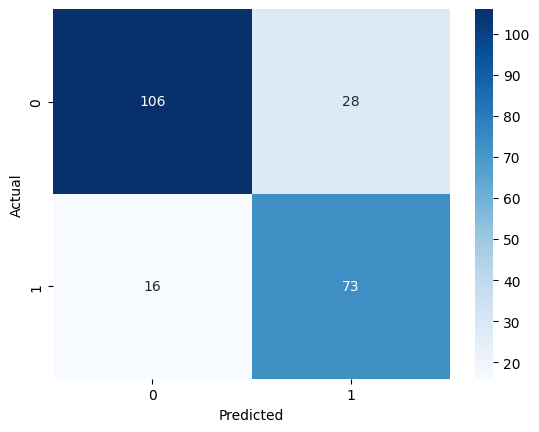

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, LogisticR_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


True Negatives (TN) = 106 → non-survivors correctly predicted.

False Positives (FP) = 28 → predicted “survived” but actually didn’t.

False Negatives (FN) = 16 → predicted “not survived” but actually survived.

True Positives (TP) = 73 → survivors correctly predicted.